# PHD Hackathon

# `Broadband Outage Detection`

### Description:

India is seeing an explosion of new competitors in the Broadband space. 'India Broadband' is
a company that is now seeing a lot of customer churn due to customer dissatisfaction
because of broadband outages.

The company has now curated a dataset, where it tracks several variables that it believes
impact the `outage_duration`. They have tracked three different outage durations, `0` for
no outage, `1` for short outages that last anywhere between a few minutes and a maximum
of 2 hours, and `2` for long outages that can last from 2 hours to sometimes even a couple
of days.

You will now have to use these metrics that the company has tracked to create a machine
learning model that will be able to predict the `outage_duration` so that the company can
better handle outages and improve customer satisfaction and therefore reduce customer
churn.


## 1. Importing Libraries

In [1]:
import numpy as np                   # array/mathematical package
import pandas as pd                  # data manipulation/analysis package
import matplotlib.pyplot as plt      # library for vizualisations in matlab style
import seaborn as sns                # matplot based package for stylised plots
sns.set()                            # set seaborn as default aesthetics in plots

## 2 Reading Datasets

In [2]:
# broadband data
broadband_df = pd.read_csv('data/broadband_data.csv')

# outage data
outage_df = pd.read_csv('data/outage_data.csv')

# report data
report_df = pd.read_csv('data/report_data.csv')

# server data
server_df = pd.read_csv('data/server_data.csv')

# train data
train_df = pd.read_csv('data/train_data.csv')

## 3. Exploring the datasets

#### 3.1 Broadband data

In [3]:
broadband_df.head()

id    broadband_type
0  6597  broadband_type_8
1  8011  broadband_type_8
2  2597  broadband_type_8
3  5022  broadband_type_8
4  6852  broadband_type_8

In [4]:
# creating a dictionary for broadband types with key as the type and name as the value
broadband_type_dict = {  'broadband_type_8'  : 'ADSL 1',
                         'broadband_type_2'  : 'ADSL 2',
                         'broadband_type_6'  : 'ADSL 2+',
                         'broadband_type_7'  : 'Cable',
                         'broadband_type_4'  : 'Fiber 1',
                         'broadband_type_9'  : 'BPL',
                         'broadband_type_3'  : 'Fiber 2',
                         'broadband_type_10' : 'Fiber High Speed',
                         'broadband_type_1'  : 'Fiber Ultra',
                         'broadband_type_5'  : 'Fiber Ultra Max'}


In [5]:
# mapping the values of the dictionary broadband_type_dict based on the broadband_name as the key
broadband_df['broadband_name']=broadband_df.broadband_type.map(broadband_type_dict)

In [6]:
broadband_df.head()

id    broadband_type broadband_name
0  6597  broadband_type_8         ADSL 1
1  8011  broadband_type_8         ADSL 1
2  2597  broadband_type_8         ADSL 1
3  5022  broadband_type_8         ADSL 1
4  6852  broadband_type_8         ADSL 1

In [7]:
broadband_df.tail()

id    broadband_type broadband_name
21071  3761  broadband_type_8         ADSL 1
21072  8720  broadband_type_8         ADSL 1
21073  6488  broadband_type_8         ADSL 1
21074   878  broadband_type_8         ADSL 1
21075  4464  broadband_type_8         ADSL 1

In [8]:
# shape of the data post mapping with the dictionary
broadband_df.shape

(21076, 3)

In [9]:
# description of the data
broadband_df.describe(include='all')

id    broadband_type broadband_name
count   21076.000000             21076          21076
unique           NaN                10             10
top              NaN  broadband_type_8         ADSL 1
freq             NaN             10268          10268
mean     9255.869330               NaN            NaN
std      5366.730222               NaN            NaN
min         1.000000               NaN            NaN
25%      4599.750000               NaN            NaN
50%      9256.500000               NaN            NaN
75%     13907.250000               NaN            NaN
max     18552.000000               NaN            NaN

In [10]:
# summary of the dataframe
broadband_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              21076 non-null  int64 
 1   broadband_type  21076 non-null  object
 2   broadband_name  21076 non-null  object
dtypes: int64(1), object(2)
memory usage: 494.1+ KB


>Seems like id is being treated as int, i.e. as numerical but as we know it is a category and so are the other two columns. Hence changing the datatype in the next step

In [11]:
broadband_df = broadband_df.astype('category')
broadband_df.head()

id    broadband_type broadband_name
0  6597  broadband_type_8         ADSL 1
1  8011  broadband_type_8         ADSL 1
2  2597  broadband_type_8         ADSL 1
3  5022  broadband_type_8         ADSL 1
4  6852  broadband_type_8         ADSL 1

In [12]:
broadband_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              21076 non-null  category
 1   broadband_type  21076 non-null  category
 2   broadband_name  21076 non-null  category
dtypes: category(3)
memory usage: 868.2 KB


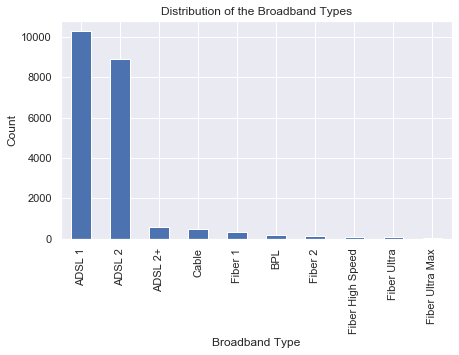

In [13]:
plt.figure(figsize=(7,4))
broadband_df.broadband_name.value_counts().plot(kind='bar')
plt.xlabel('Broadband Type')
plt.ylabel('Count')
plt.title('Distribution of the Broadband Types')
plt.show()

> On exploring the data set we find that the broadband company has recorded most of the complaints where the broadband type was Either ADSL 1 or ADSL 2 where the Fiber type of broadbands have registered the least complaints

`Wrangling of data for model building`

In [14]:
# transforming the categorical columns to numerical as needed for the model building
broadband_df = broadband_df[['id','broadband_name']].pivot_table(values='broadband_name',index='id',columns='broadband_name',fill_value=0,aggfunc=len)
broadband_df.head()

broadband_name  ADSL 1  ADSL 2  ADSL 2+  BPL  Cable  Fiber 1  Fiber 2  \
id                                                                      
1                    1       0        1    0      0        0        0   
2                    0       1        0    0      0        0        0   
3                    1       0        0    0      0        0        0   
4                    0       1        0    0      0        0        0   
5                    0       1        0    0      0        0        0   

broadband_name  Fiber High Speed  Fiber Ultra  Fiber Ultra Max  
id                                                              
1                              0            0                0  
2                              0            0                0  
3                              0            0                0  
4                              0            0                0  
5                              0            0                0

In [15]:
broadband_df.columns = broadband_df.columns.categories
broadband_df.head()

ADSL 1  ADSL 2  ADSL 2+  BPL  Cable  Fiber 1  Fiber 2  Fiber High Speed  \
id                                                                            
1        1       0        1    0      0        0        0                 0   
2        0       1        0    0      0        0        0                 0   
3        1       0        0    0      0        0        0                 0   
4        0       1        0    0      0        0        0                 0   
5        0       1        0    0      0        0        0                 0   

    Fiber Ultra  Fiber Ultra Max  
id                                
1             0                0  
2             0                0  
3             0                0  
4             0                0  
5             0                0

In [16]:
broadband_df.reset_index(inplace=True)
broadband_df.head()

id  ADSL 1  ADSL 2  ADSL 2+  BPL  Cable  Fiber 1  Fiber 2  Fiber High Speed  \
0  1       1       0        1    0      0        0        0                 0   
1  2       0       1        0    0      0        0        0                 0   
2  3       1       0        0    0      0        0        0                 0   
3  4       0       1        0    0      0        0        0                 0   
4  5       0       1        0    0      0        0        0                 0   

   Fiber Ultra  Fiber Ultra Max  
0            0                0  
1            0                0  
2            0                0  
3            0                0  
4            0                0

In [17]:
# Checking for nulls in the data
broadband_df.isnull().values.any()

False

In [18]:
broadband_df.shape

(18552, 11)

#### 3.2 Outage data

In [19]:
outage_df.head()

id    outage_type
0  6597  outage_type_2
1  8011  outage_type_2
2  2597  outage_type_2
3  5022  outage_type_1
4  6852  outage_type_1

In [20]:
# shape of the data
outage_df.shape

(18552, 2)

In [21]:
# summary of the dataset
outage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           18552 non-null  int64 
 1   outage_type  18552 non-null  object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB


>Seems like id is being treated as int, i.e. as numerical but as we know it is a category and so are the other two columns. Hence changing the datatype in the next step

In [22]:
# changing the data type of the columns
outage_df = outage_df.astype('category')

In [23]:
# description of the data
outage_df.describe(include='all')

id    outage_type
count   18552          18552
unique  18552              5
top     18552  outage_type_2
freq        1           8737

Above cell indicates
1. All the ids are unique
2. Most frequent outage type is `outage_type_2` which has occurred `8737` times

In [24]:
# The frequency of each outage type
outage_df.outage_type.value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_5      65
outage_type_3       8
Name: outage_type, dtype: int64

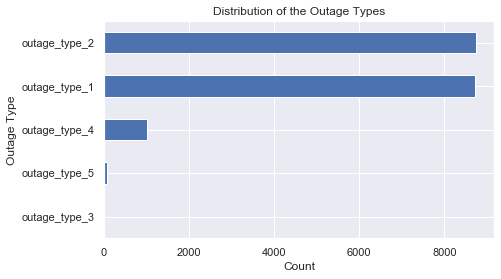

In [25]:
# Plotting the frequency from the above cell
plt.figure(figsize=(7,4))
outage_df.outage_type.value_counts(ascending=True).plot(kind='barh')
plt.ylabel('Outage Type')
plt.xlabel('Count')
plt.title('Distribution of the Outage Types')
plt.show()

> `outage_type_1` and `outage_type_2` seems to be most frequent whereas `outage_type_5` and `outage_type_3` are the least

`Wrangling the data for model building`

In [26]:
outage_df = outage_df.pivot_table(values='outage_type',index='id',columns='outage_type',fill_value=0,aggfunc=len)
outage_df.head()

outage_type  outage_type_1  outage_type_2  outage_type_3  outage_type_4  \
id                                                                        
1                        1              0              0              0   
2                        0              1              0              0   
3                        1              0              0              0   
4                        0              0              0              1   
5                        0              1              0              0   

outage_type  outage_type_5  
id                          
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

In [27]:
outage_df.columns = outage_df.columns.categories
outage_df.head()

outage_type_1  outage_type_2  outage_type_3  outage_type_4  outage_type_5
id                                                                           
1               1              0              0              0              0
2               0              1              0              0              0
3               1              0              0              0              0
4               0              0              0              1              0
5               0              1              0              0              0

In [28]:
outage_df.reset_index(inplace=True)
outage_df.head()

id  outage_type_1  outage_type_2  outage_type_3  outage_type_4  \
0  1              1              0              0              0   
1  2              0              1              0              0   
2  3              1              0              0              0   
3  4              0              0              0              1   
4  5              0              1              0              0   

   outage_type_5  
0              0  
1              0  
2              0  
3              0  
4              0

In [29]:
# Checking for any nulls
outage_df.isnull().values.any()

False

In [30]:
# Final shape after processing
outage_df.shape

(18552, 6)

#### 3.3 Report data

In [31]:
#Initial shape of the data
report_df.shape

(58671, 3)

In [32]:
# Summary of the data
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               58671 non-null  int64 
 1   log_report_type  58671 non-null  object
 2   volume           58671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


> `id` and `log_report_type` are of type category but it is currently of type int64 and object respectively.

In [33]:
# Changing the data type of the columns mention above
report_df[['id','log_report_type']] = report_df[['id','log_report_type']].astype('category')

In [34]:
report_df.describe(include='all')

id      log_report_type        volume
count   58671.0                58671  58671.000000
unique  18552.0                  386           NaN
top     15184.0  log_report_type_312           NaN
freq       20.0                 5267           NaN
mean        NaN                  NaN      9.685296
std         NaN                  NaN     27.314433
min         NaN                  NaN      1.000000
25%         NaN                  NaN      1.000000
50%         NaN                  NaN      2.000000
75%         NaN                  NaN      7.000000
max         NaN                  NaN   1310.000000

From the above description we can infer that
1. `id` is not unique, which means an `id` has occured multiple times and with possibly different log_report_type
3. Total report types are 386
2. Most frequent `log_report_type` is `log_report_type_312` which has occured `5267` times

**Since there are a total of 386 unique reports it will be difficult to visualize all 386 in a single frame, hence lets see what are the top 20 most frequent log_report_type**

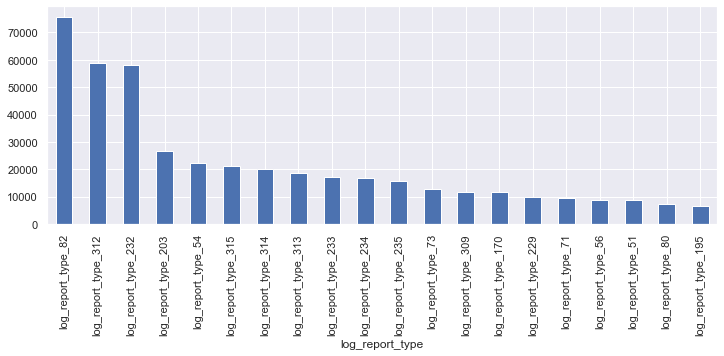

In [35]:
plt.figure(figsize=(12,4))
report_df.groupby('log_report_type')['volume'].sum().nlargest(20).plot(kind='bar')
plt.show()

**Now lets see what are the ids that registered most complaints, by visualizing the 50 most frequent ids and their frequencies**

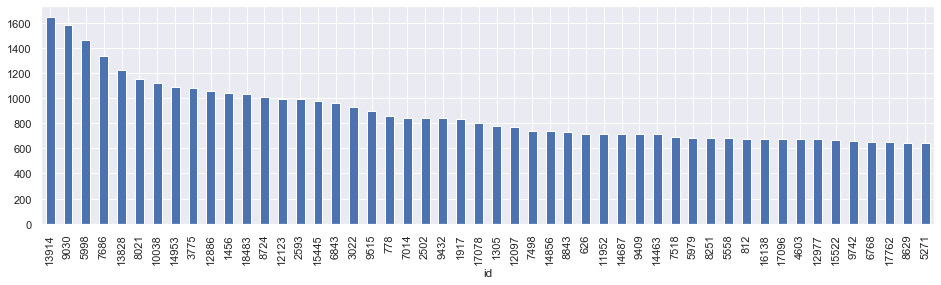

In [36]:
plt.figure(figsize=(16,4))
report_df.groupby('id')['volume'].sum().nlargest(50).plot(kind='bar')
plt.show()

`Wrangling data for model building`

In [37]:
report_volume_df = pd.DataFrame(report_df.groupby('id')['volume'].sum()).reset_index()
report_volume_df.head()

id  volume
0  1       5
1  2       5
2  3       2
3  4       3
4  5      17

In [38]:
report_df = report_df.pivot_table(values='volume',index='id',columns='log_report_type',fill_value=0,aggfunc=np.sum)
report_df.head()

log_report_type  log_report_type_1  log_report_type_10  log_report_type_100  \
id                                                                            
1                                0                   0                    0   
2                                0                   0                    0   
3                                0                   0                    0   
4                                0                   0                    0   
5                                0                   0                    0   

log_report_type  log_report_type_101  log_report_type_102  \
id                                                          
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   
5                                  0                    0   

log_report_type  log_report_type_103  log_report_type_104  \
id                                                          
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   
5                                  0                    0   

log_report_type  log_report_type_105  log_report_type_106  \
id                                                          
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   
5                                  0                    0   

log_report_type  log_report_type_107  ...  log_report_type_90  \
id                                    ...                       
1                                  0  ...                   0   
2                                  0  ...                   0   
3                                  0  ...                   0   
4                                  0  ...                   0   
5                                  0  ...                   0   

log_report_type  log_report_type_91  log_report_type_92  log_report_type_93  \
id                                                                            
1                                 0                   0                   0   
2                                 0                   0                   0   
3                                 0                   0                   0   
4                                 0                   0                   0   
5                                 0                   0                   0   

log_report_type  log_report_type_94  log_report_type_95  log_report_type_96  \
id                                                                            
1                                 0                   0                   0   
2                                 0                   0                   0   
3                                 0                   0                   0   
4                                 0                   0                   0   
5                                 0                   0                   0   

log_report_type  log_report_type_97  log_report_type_98  log_report_type_99  
id                                                                           
1                                 0                   0                   0  
2                                 0                   0                   0  
3                                 0                   0                   0  
4                                 0                   0                   0  
5                                 0                   0                   0  

[5 rows x 386 columns]

In [39]:
report_df.columns = report_df.columns.categories
report_df.head()

log_report_type_1  log_report_type_10  log_report_type_100  \
id                                                               
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   
5                   0                   0                    0   

    log_report_type_101  log_report_type_102  log_report_type_103  \
id                                                                  
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   
5                     0                    0                    0   

    log_report_type_104  log_report_type_105  log_report_type_106  \
id                                                                  
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   
5                     0                    0                    0   

    log_report_type_107  ...  log_report_type_90  log_report_type_91  \
id                       ...                                           
1                     0  ...                   0                   0   
2                     0  ...                   0                   0   
3                     0  ...                   0                   0   
4                     0  ...                   0                   0   
5                     0  ...                   0                   0   

    log_report_type_92  log_report_type_93  log_report_type_94  \
id                                                               
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
5                    0                   0                   0   

    log_report_type_95  log_report_type_96  log_report_type_97  \
id                                                               
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
5                    0                   0                   0   

    log_report_type_98  log_report_type_99  
id                                          
1                    0                   0  
2                    0                   0  
3                    0                   0  
4                    0                   0  
5                    0                   0  

[5 rows x 386 columns]

In [40]:
report_df.reset_index(inplace=True)
report_df.head()

id  log_report_type_1  log_report_type_10  log_report_type_100  \
0  1                  0                   0                    0   
1  2                  0                   0                    0   
2  3                  0                   0                    0   
3  4                  0                   0                    0   
4  5                  0                   0                    0   

   log_report_type_101  log_report_type_102  log_report_type_103  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   log_report_type_104  log_report_type_105  log_report_type_106  ...  \
0                    0                    0                    0  ...   
1                    0                    0                    0  ...   
2                    0                    0                    0  ...   
3                    0                    0                    0  ...   
4                    0                    0                    0  ...   

   log_report_type_90  log_report_type_91  log_report_type_92  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   log_report_type_93  log_report_type_94  log_report_type_95  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   log_report_type_96  log_report_type_97  log_report_type_98  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   log_report_type_99  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 387 columns]

In [41]:
# Checking if there are any nulls
report_df.isnull().values.any()

False

In [42]:
# Shape of the processed dataset
report_df.shape

(18552, 387)

#### 3.4 Server Data

In [43]:
server_df.head()

id     transit_server_type
0  6597  transit_server_type_11
1  8011  transit_server_type_15
2  2597  transit_server_type_15
3  5022  transit_server_type_15
4  5022  transit_server_type_11

In [44]:
# Shape of the data prior the processing
server_df.shape

(31170, 2)

In [45]:
# Summary of the data
server_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   31170 non-null  int64 
 1   transit_server_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


In [46]:
# Changing the data to category type
server_df = server_df.astype('category')

In [47]:
# Summary post data conversion
server_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   31170 non-null  category
 1   transit_server_type  31170 non-null  category
dtypes: category(2)
memory usage: 879.3 KB


In [48]:
# Data description
server_df.describe(include='all')

id     transit_server_type
count   31170                   31170
unique  18552                      53
top     10354  transit_server_type_11
freq       11                    7888

From the description we can infer the following
1. There 18552 unique `id`s
2. Most frequently occuring `id` is `10354` which is occuring 11 times
3. There are 53 unique `transit_server_type`s
4. Most frequent transit server type is `transit_server_type_11` which is occuring `7888` times

**Let's visualize the 20 most frequent transit_server_type and their frequencies**

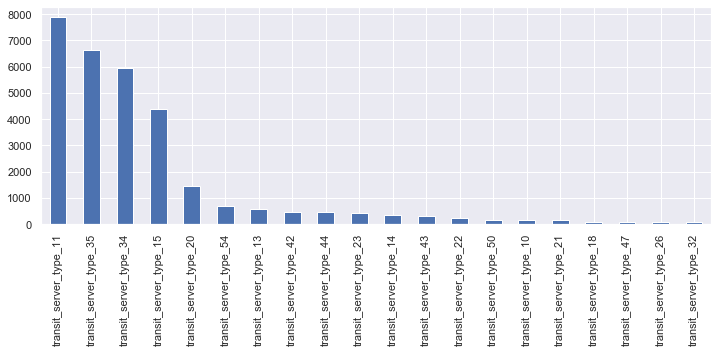

In [49]:
plt.figure(figsize=(12,4))
server_df.transit_server_type.value_counts().nlargest(20).plot(kind='bar')
plt.show()

`Wrangling data for model building`

In [50]:
server_df = server_df.pivot_table(values='transit_server_type',index='id',columns='transit_server_type',fill_value=0,aggfunc=len)
server_df.head()

transit_server_type  transit_server_type_1  transit_server_type_10  \
id                                                                   
1                                        0                       0   
2                                        0                       0   
3                                        0                       0   
4                                        0                       0   
5                                        0                       0   

transit_server_type  transit_server_type_11  transit_server_type_12  \
id                                                                    
1                                         1                       0   
2                                         0                       0   
3                                         1                       0   
4                                         0                       0   
5                                         0                       0   

transit_server_type  transit_server_type_13  transit_server_type_14  \
id                                                                    
1                                         1                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
5                                         0                       0   

transit_server_type  transit_server_type_15  transit_server_type_17  \
id                                                                    
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
5                                         0                       0   

transit_server_type  transit_server_type_18  transit_server_type_19  ...  \
id                                                                   ...   
1                                         0                       0  ...   
2                                         0                       0  ...   
3                                         0                       0  ...   
4                                         0                       0  ...   
5                                         0                       0  ...   

transit_server_type  transit_server_type_5  transit_server_type_50  \
id                                                                   
1                                        0                       0   
2                                        0                       0   
3                                        0                       0   
4                                        0                       0   
5                                        0                       0   

transit_server_type  transit_server_type_51  transit_server_type_52  \
id                                                                    
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
5                                         0                       0   

transit_server_type  transit_server_type_53  transit_server_type_54  \
id                                                                    
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
5                                         0                       0

In [51]:
server_df.columns = server_df.columns.categories
server_df.head()

transit_server_type_1  transit_server_type_10  transit_server_type_11  \
id                                                                          
1                       0                       0                       1   
2                       0                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   
5                       0                       0                       0   

    transit_server_type_12  transit_server_type_13  transit_server_type_14  \
id                                                                           
1                        0                       1                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   
5                        0                       0                       0   

    transit_server_type_15  transit_server_type_17  transit_server_type_18  \
id                                                                           
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   
5                        0                       0                       0   

    transit_server_type_19  ...  transit_server_type_5  \
id                          ...                          
1                        0  ...                      0   
2                        0  ...                      0   
3                        0  ...                      0   
4                        0  ...                      0   
5                        0  ...                      0   

    transit_server_type_50  transit_server_type_51  transit_server_type_52  \
id                                                                           
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   
5                        0                       0                       0   

    transit_server_type_53  transit_server_type_54  transit_server_type_6  \
id                                                                          
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   
5                        0                       0                      0   

    transit_server_type_7  transit_server_type_8  transit_server_type_9  
id                                                                       
1                       0                      0                      0  
2                       0                      0                      0  
3                       0                      0                      0  
4                       0                      0                      0  
5                       0                      0                      0  

[5 rows x 53 columns]

In [52]:
server_df= server_df.reset_index()
server_df.head()

id  transit_server_type_1  transit_server_type_10  transit_server_type_11  \
0  1                      0                       0                       1   
1  2                      0                       0                       0   
2  3                      0                       0                       1   
3  4                      0                       0                       0   
4  5                      0                       0                       0   

   transit_server_type_12  transit_server_type_13  transit_server_type_14  \
0                       0                       1                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   transit_server_type_15  transit_server_type_17  transit_server_type_18  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   ...  transit_server_type_5  transit_server_type_50  transit_server_type_51  \
0  ...                      0                       0                       0   
1  ...                      0                       0                       0   
2  ...                      0                       0                       0   
3  ...                      0                       0                       0   
4  ...                      0                       0                       0   

   transit_server_type_52  transit_server_type_53  transit_server_type_54  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   transit_server_type_6  transit_server_type_7  transit_server_type_8  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   transit_server_type_9  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 54 columns]

In [53]:
# checking for any nulls
server_df.isnull().values.any()

False

In [54]:
# shape of the dataset post processing
server_df.shape

(18552, 54)

#### 3.5 Train Data

In [55]:
train_df.head()

id area_code  outage_duration
0  13366  area_415                1
1   6783  area_474                0
2   9519  area_931                1
3  10202  area_700                1
4   4555  area_600                2

In [56]:
# Shape of the train data before processing
train_df.shape

(5904, 3)

In [57]:
# Summary of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5904 non-null   int64 
 1   area_code        5904 non-null   object
 2   outage_duration  5904 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 138.5+ KB


In [58]:
# Changing the type of the data
train_df = train_df.astype('category')

In [59]:
# Summary post change of the type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               5904 non-null   category
 1   area_code        5904 non-null   category
 2   outage_duration  5904 non-null   category
dtypes: category(3)
memory usage: 282.0 KB


In [60]:
# data description
train_df.describe()

id area_code  outage_duration
count    5904      5904             5904
unique   5904       876                3
top     18550  area_821                0
freq        1        67             3827

From the description above we can infer that,
1. Each row has a unique `id` and there are a total of `5904` ids
2. There are a total `876` `aread_codes`
3. `area_821` is the most frequently occuring with the frequency of `67`

**Lets understand the distribution of the outage_duration with help of a pie-chart**

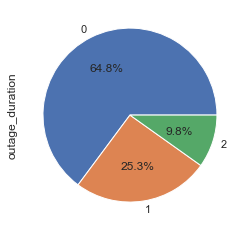

In [61]:
train_df.outage_duration.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

There is clear class imbalance in the train data

## 4. Answers to the operations team

#### 4.1 Which areas are most prone to long outage durations?

In [62]:
# Filtering the area with outage duration is long, and getting the count of occurence
long_outage_area_count = train_df.loc[train_df.outage_duration==2].area_code.value_counts()

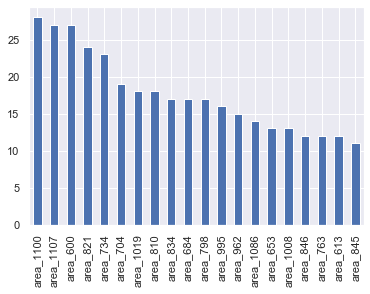

In [63]:
# Plotting top 20 areas most prone to long outage duration
long_outage_area_count.nlargest(20).plot(kind='bar')
plt.show()

In [68]:
# Getting the names of all the areas with outage_duration long in a list in decreasing order
long_outage_areas = list(long_outage_area_count[long_outage_area_count>0].index)

In [65]:
# printing the above list
print(long_outage_areas)

['area_1100', 'area_1107', 'area_600', 'area_821', 'area_734', 'area_704', 'area_1019', 'area_810', 'area_834', 'area_684', 'area_798', 'area_995', 'area_962', 'area_1086', 'area_653', 'area_1008', 'area_846', 'area_763', 'area_613', 'area_845', 'area_638', 'area_1042', 'area_1052', 'area_895', 'area_1075', 'area_976', 'area_1061', 'area_921', 'area_599', 'area_892', 'area_745', 'area_984', 'area_931', 'area_866', 'area_830', 'area_779', 'area_641', 'area_644', 'area_906', 'area_885', 'area_909', 'area_884', 'area_1051', 'area_897', 'area_769', 'area_1089', 'area_864', 'area_844', 'area_13', 'area_744', 'area_726', 'area_705', 'area_7', 'area_619', 'area_674', 'area_667', 'area_646', 'area_648', 'area_1050', 'area_1', 'area_1020', 'area_925', 'area_926', 'area_1046', 'area_991', 'area_1024', 'area_839', 'area_724', 'area_1016', 'area_73', 'area_924', 'area_655', 'area_840', 'area_1109', 'area_1111', 'area_826', 'area_1103', 'area_601', 'area_1026', 'area_972', 'area_1017', 'area_774', 

#### 4.2 Which broadband types are suspect of long outage durations?

In [66]:
# Filtering long outage_duration, merging the train_data with broadband_df, getting the sum along axis=0 , sorting in descending
broadband_types_long_outage = train_df.loc[train_df.outage_duration==2][['id']]\
                                .merge(broadband_df,on='id').sum().drop(index='id')\
                                    .sort_values(ascending=False)
print(broadband_types_long_outage)

ADSL 1              544
ADSL 2               82
ADSL 2+              26
Fiber 1              17
Fiber Ultra          10
Cable                 9
Fiber 2               4
BPL                   4
Fiber Ultra Max       3
Fiber High Speed      1
dtype: int64


As we can see the long outage duration has ADSL 1 as the most common type of broadband followed by other ADSL types. Lets visualize the same in a bar chart

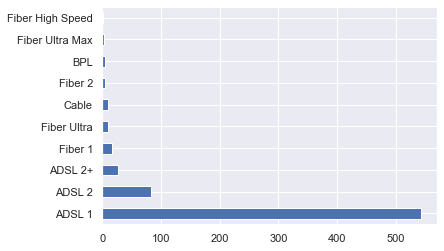

In [67]:
broadband_types_long_outage.plot(kind='barh')
plt.show()

#### 4.3 Any other recommendations to improve the detection of outage durations.
1. As we saw some of the datasets had predictor variables of categorical type which huge number of categories, we can group data and reduce them, to improve our detection of outage durations
2. From the pie chart we saw that the training data has some class imbalance, hence using techniques like smoting etc. can improve the detection of the outage duration

## 5. Summary

* We described the problem statement
* Imported necessary libraries to perform EDA
* Read all the datasets in the raw format
* Data Wrangling to get the necessary format for EDA and model building
* Explored each dataset with description and EDA
* Answers to the questions by the operations team
* Recommendations to improve the detection of outage durations

## 6. Next Steps

* Splitting the train dataset into train and validation
* Trying models in the order of the increasing complexity
* Analyzing the performance(bias/variance) of different models
* Tweaking the models and analyzing the performance
* Choosing the best model